# Anomaly Detection & Time Series

1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
   - Anomaly detection finds data points that differ from normal patterns.
     Point anomalies are single unusual values, like a sudden high temperature. Contextual anomalies depend on context, like winter heat. Collective anomalies are unusual patterns in a group, like many failed logins indicating a cyber attack.
    
2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
   their approach and suitable use cases.
   - Isolation Forest isolates anomalies using random splits; outliers need fewer splits. It is fast and suitable for large, high-dimensional datasets.
   - DBSCAN uses density; points in low-density regions are anomalies. Good for spatial data.
   - Local Outlier Factor (LOF) compares local density with neighbors; useful when data has varying densities.

3. What are the key components of a Time Series? Explain each with one
   example.

   - Key components of a time series are:
   - Trend – long-term increase or decrease, like rising yearly sales
   - Seasonality – repeating pattern over fixed periods, like higher ice-cream
     sales in summer.
   - Cyclic – long-term fluctuations, like business cycles.
   - Irregular – random variations, like sudden sales drop due to strikes.

4. Define Stationary in time series. How can you test and transform a
   non-stationary series into a stationary one?
   - A time series is stationary if its mean, variance, and autocorrelation remain constant over time.
   - It can be tested using the ADF test or plots.
   - Non-stationary series can be transformed using differencing, log
     transformation, or detrending.

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of
   structure and application.
   - AR uses past values.
   - MA uses past errors.
   - ARIMA combines AR and MA with differencing for non-stationary data.
   - SARIMA adds seasonality.
   - SARIMAX includes external variables.
   - AR/MA are simple, ARIMA for trends, SARIMA for seasonal data, SARIMAX when
     other factors affect the series.

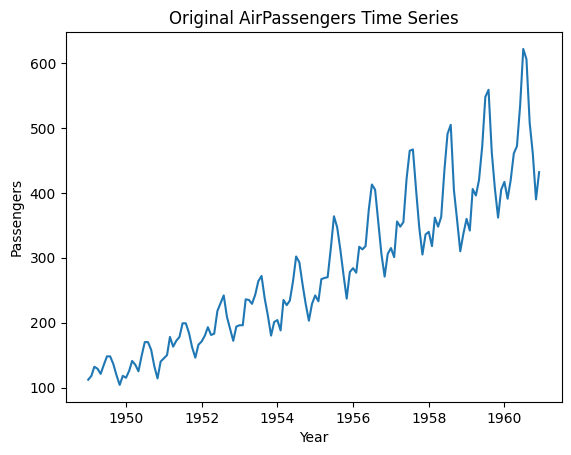

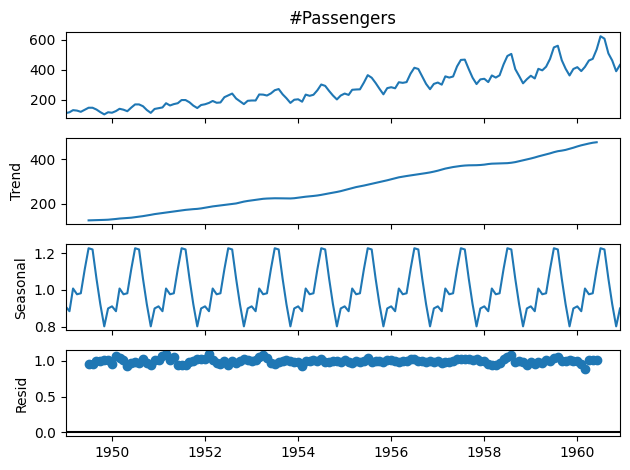

In [5]:
#6 Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("AirPassengers.csv")

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.plot(data['#Passengers'])
plt.title("Original AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

decomposition = seasonal_decompose(data['#Passengers'], model='multiplicative')

decomposition.plot()
plt.show()

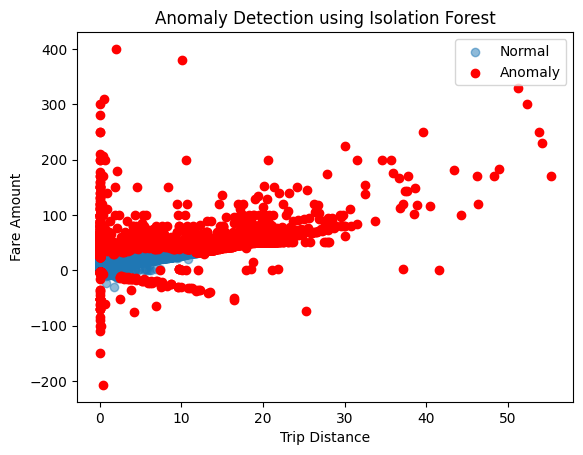

In [2]:
#7 Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

data = pd.read_csv("NYC_taxi_fare_data.csv",  low_memory=False)

X = data[['trip_distance', 'fare_amount']]

iso = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso.fit_predict(X)

normal = data[data['anomaly'] == 1]
anomaly = data[data['anomaly'] == -1]

plt.scatter(normal['trip_distance'], normal['fare_amount'], alpha=0.5, label='Normal')
plt.scatter(anomaly['trip_distance'], anomaly['fare_amount'], color='red', label='Anomaly')
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Anomaly Detection using Isolation Forest")
plt.legend(loc='upper right')
plt.show()


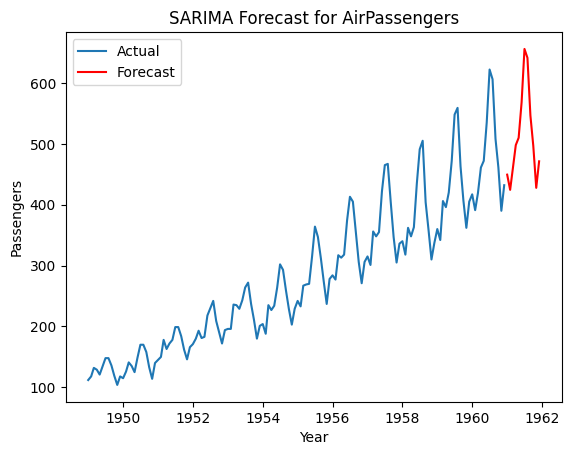

In [13]:
#8 Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data = data.asfreq('MS')

model = SARIMAX(
    data['#Passengers'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)
results = model.fit()

forecast = results.forecast(steps=12)

plt.plot(data['#Passengers'], label="Actual")
plt.plot(forecast, label="Forecast", color='red')
plt.title("SARIMA Forecast for AirPassengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


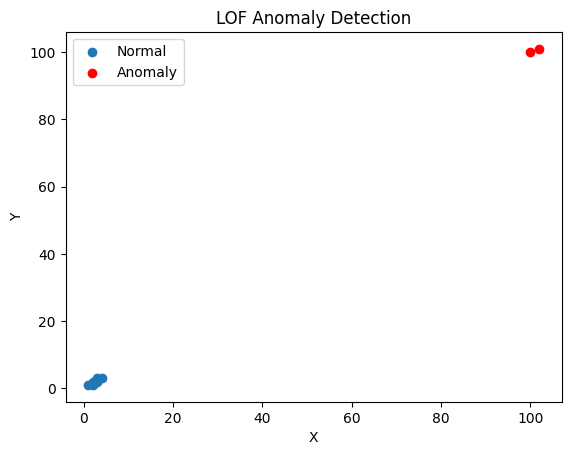

In [14]:
#9 Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

data = pd.DataFrame({
    'x': [1, 2, 2, 3, 3, 4, 100, 102],
    'y': [1, 1, 2, 2, 3, 3, 100, 101]
})

lof = LocalOutlierFactor(n_neighbors=2)
data['anomaly'] = lof.fit_predict(data[['x', 'y']])

normal = data[data['anomaly'] == 1]
anomaly = data[data['anomaly'] == -1]

plt.scatter(normal['x'], normal['y'], label='Normal')
plt.scatter(anomaly['x'], anomaly['y'], color='red', label='Anomaly')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LOF Anomaly Detection")
plt.legend()
plt.show()


10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
   - How would you detect anomalies in this streaming data (Isolation Forest /
     LOF /DBSCAN)?
   - Which time series model would you use for short-term forecasting (ARIMA /
     SARIMA / SARIMAX)?
   - How would you validate and monitor the performance over time?
   - How would this solution help business decisions or operations?

Real-time Data Science Workflow (Power Grid)

1. Anomaly Detection (Streaming):
I would use Isolation Forest for real-time detection because it is fast and scalable. For local pattern changes, LOF can help, while DBSCAN is useful for regional density-based anomalies.

2. Short-term Forecasting:
I would use SARIMAX since it models seasonality and also uses external factors like weather and region.

3. Validation & Monitoring:
Monitor forecast errors (MAE, RMSE), track anomaly rates, retrain models periodically, and use dashboards with alerts.

4. Business Impact:
Helps prevent outages, optimize load balancing, plan energy generation, reduce costs, and enable quick response to abnormal demand.